In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

ModuleNotFoundError: No module named 'sklearn'

In [4]:
data = pd.read_csv("../data/face-landmakr-training.csv")
print(data.shape)

FileNotFoundError: [Errno 2] No such file or directory: '../data/face-landmakr-training.csv'

In [3]:
data['Image'] = data['Image'].apply(lambda row: np.fromstring(row, sep=' '))
# 결측치가 있는 row를 없앰
data = data.dropna()
print(data.shape)

(2140, 31)


In [4]:
# 이미지를 0~1 사이로 정규화
X_train = np.vstack(data['Image'].values) / 255.
# 계산이 용이하도록 int로 표현되는 명암을 float 타입으로 변경
X_train = X_train.astype(np.float32)

print(data['Image'].values.shape)

# 2차원 이미지로 만들어주기
X_train = X_train.reshape(-1, 96, 96, 1)

print(X_train.shape)

(2140,)
(2140, 96, 96, 1)


In [5]:
y = data[data.columns[:-1]].values
# 이미지의 중앙점을 기준으로 -1~1 사이로 표현되기 위해 좌표를 중앙으로 정규화
y = (y - 48) / 48

X_train, y = shuffle(X_train, y, random_state=42)  # shuffle train data
y = y.astype(np.float32)

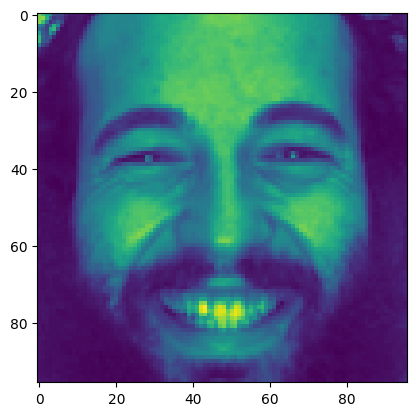

In [16]:
plt.imshow(X_train[0])

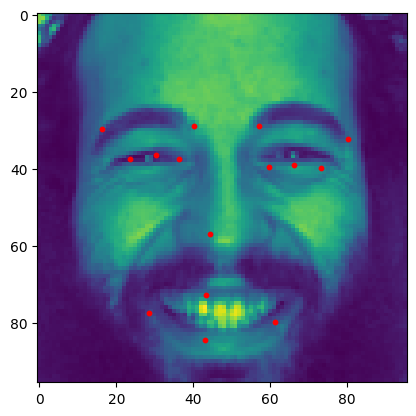

In [17]:
facial_pts = data.drop(['Image'], axis=1).to_numpy()

plt.scatter(facial_pts[0, 0::2], facial_pts[0, 1::2],marker='o',c='r',s=10)
plt.imshow(X_train[0])

In [6]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout
from keras.layers import Flatten, Dense

model =  Sequential()
model.add(Conv2D(filters=16, kernel_size=3, activation = 'relu', input_shape=(96,96,1)))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=128, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=256, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))


model.add(Dense(30))

model.summary()

2023-06-22 20:53:12.960366: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-06-22 20:53:13.016014: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-22 20:53:13.260047: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-22 20:53:13.261075: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-22 20:53:14.387932: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 94, 94, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 47, 47, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 45, 45, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 22, 22, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 20, 20, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 10, 10, 64)       0

In [19]:
#Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

model.fit(X_train, y, validation_split=0.2,
         batch_size=32, epochs=50
         , verbose=1)

model.save('my_model.h5'),
model.load_weights('my_model.h5')

Epoch 1/50


54/54 [==============================] - 7s 98ms/step - loss: 0.0243 - accuracy: 0.5175 - val_loss: 0.0063 - val_accuracy: 0.6963
Epoch 2/50
54/54 [==============================] - 5s 85ms/step - loss: 0.0076 - accuracy: 0.6232 - val_loss: 0.0046 - val_accuracy: 0.6963
Epoch 3/50
54/54 [==============================] - 6s 108ms/step - loss: 0.0061 - accuracy: 0.6612 - val_loss: 0.0044 - val_accuracy: 0.6963
Epoch 4/50
54/54 [==============================] - 6s 114ms/step - loss: 0.0057 - accuracy: 0.6746 - val_loss: 0.0047 - val_accuracy: 0.6963
Epoch 5/50
54/54 [==============================] - 6s 113ms/step - loss: 0.0054 - accuracy: 0.6793 - val_loss: 0.0049 - val_accuracy: 0.6963
Epoch 6/50
54/54 [==============================] - 6s 111ms/step - loss: 0.0052 - accuracy: 0.6893 - val_loss: 0.0043 - val_accuracy: 0.6963
Epoch 7/50
54/54 [==============================] - 7s 122ms/step - loss: 0.0051 - accuracy: 0.6951 - val_loss: 0.0043 - val_accuracy: 0.6963
Epoch 8/50
54/54 [=

In [20]:
import cv2

img = cv2.imread("test2.png", cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img,(96,96))/255
img = img.reshape(1, 96, 96, 1)
print(img.shape)

(1, 96, 96, 1)


1/1 [==============================] - 0s 374ms/step
(1, 30)
[67.4175   27.365253 59.045956 74.7818   35.925434 18.660496 58.09547
 80.47963  40.37191  10.797989 54.33071  67.74922  31.396488 51.073227
 51.251553]


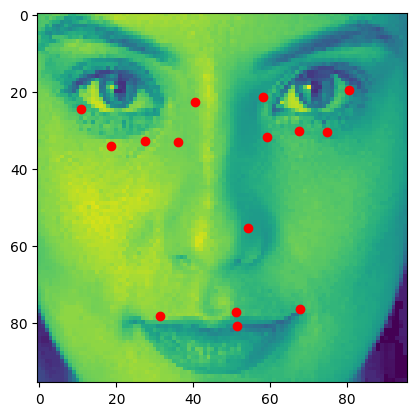

In [21]:
y_predict = model.predict(img)
print(y_predict.shape)
print(y_predict[0, 0::2] * 48 + 48)

plt.figure()
plt.imshow(img.reshape((96, 96)))
plt.scatter(((y_predict[0, 0::2] * 48 + 48)), 
            ((y_predict[0, 1::2] * 48 + 48)), 
                   marker='o', c='r')
plt.show()